In [28]:
import pandas as pd
import os

current_directory = os.getcwd()
print(f"\nCurrent working directory: {current_directory}\n")

path_data = "Datasets\groove-v1.0.0\groove"
filename = os.path.join(path_data, "info.csv")

data = pd.read_csv(filename, encoding="latin-1")
data.head()


Current working directory: c:\Users\kevin\Documents\MMI\Audio Data Science\StyleExtraction



,drummer,session,id,style,bpm,beat_type,time_signature,midi_filename,audio_filename,duration,split
0,drummer1,drummer1/eval_session,drummer1/eval_session/1,funk/groove1,138,beat,4-4,drummer1/eval_session/1_funk-groove1_138_beat_...,drummer1/eval_session/1_funk-groove1_138_beat_...,27.872308,test
1,drummer1,drummer1/eval_session,drummer1/eval_session/10,soul/groove10,102,beat,4-4,drummer1/eval_session/10_soul-groove10_102_bea...,drummer1/eval_session/10_soul-groove10_102_bea...,37.691158,test
2,drummer1,drummer1/eval_session,drummer1/eval_session/2,funk/groove2,105,beat,4-4,drummer1/eval_session/2_funk-groove2_105_beat_...,drummer1/eval_session/2_funk-groove2_105_beat_...,36.351218,test
3,drummer1,drummer1/eval_session,drummer1/eval_session/3,soul/groove3,86,beat,4-4,drummer1/eval_session/3_soul-groove3_86_beat_4...,drummer1/eval_session/3_soul-groove3_86_beat_4...,44.716543,test
4,drummer1,drummer1/eval_session,drummer1/eval_session/4,soul/groove4,80,beat,4-4,drummer1/eval_session/4_soul-groove4_80_beat_4...,drummer1/eval_session/4_soul-groove4_80_beat_4...,47.987500,test


In [29]:
data["style"].value_counts()

style
rock                       281
hiphop                      91
funk                        77
punk                        58
neworleans/funk             48
                          ... 
middleeastern                1
latin/bomba                  1
latin/merengue               1
rock/rockabilly              1
latin/venezuelan-joropo      1
Name: count, Length: 76, dtype: int64

In [30]:
data["style1"] = data["style"].apply(lambda x: x.split("/")[0] if "/" in x else x)
data["style2"] = data["style"].apply(lambda x: x.split("/")[1] if "/" in x else None)
data.head()

,drummer,session,id,style,bpm,beat_type,time_signature,midi_filename,audio_filename,duration,split,style1,style2
0,drummer1,drummer1/eval_session,drummer1/eval_session/1,funk/groove1,138,beat,4-4,drummer1/eval_session/1_funk-groove1_138_beat_...,drummer1/eval_session/1_funk-groove1_138_beat_...,27.872308,test,funk,groove1
1,drummer1,drummer1/eval_session,drummer1/eval_session/10,soul/groove10,102,beat,4-4,drummer1/eval_session/10_soul-groove10_102_bea...,drummer1/eval_session/10_soul-groove10_102_bea...,37.691158,test,soul,groove10
2,drummer1,drummer1/eval_session,drummer1/eval_session/2,funk/groove2,105,beat,4-4,drummer1/eval_session/2_funk-groove2_105_beat_...,drummer1/eval_session/2_funk-groove2_105_beat_...,36.351218,test,funk,groove2
3,drummer1,drummer1/eval_session,drummer1/eval_session/3,soul/groove3,86,beat,4-4,drummer1/eval_session/3_soul-groove3_86_beat_4...,drummer1/eval_session/3_soul-groove3_86_beat_4...,44.716543,test,soul,groove3
4,drummer1,drummer1/eval_session,drummer1/eval_session/4,soul/groove4,80,beat,4-4,drummer1/eval_session/4_soul-groove4_80_beat_4...,drummer1/eval_session/4_soul-groove4_80_beat_4...,47.987500,test,soul,groove4


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   drummer         1150 non-null   object 
 1   session         1150 non-null   object 
 2   id              1150 non-null   object 
 3   style           1150 non-null   object 
 4   bpm             1150 non-null   int64  
 5   beat_type       1150 non-null   object 
 6   time_signature  1150 non-null   object 
 7   midi_filename   1150 non-null   object 
 8   audio_filename  1090 non-null   object 
 9   duration        1150 non-null   float64
 10  split           1150 non-null   object 
 11  style1          1150 non-null   object 
 12  style2          456 non-null    object 
dtypes: float64(1), int64(1), object(11)
memory usage: 116.9+ KB


In [35]:
data.style1.value_counts()

style1
rock             341
funk             160
jazz             101
latin             97
hiphop            95
soul              63
afrocuban         60
punk              58
neworleans        53
country           29
pop               27
reggae            20
gospel            19
afrobeat          13
dance              7
blues              4
highlife           2
middleeastern      1
Name: count, dtype: int64

In [37]:
data.style2.value_counts()

style2
funk                     72
halftime                 37
brazilian-baiao          32
purdieshuffle            30
bembe                    30
rock                     20
fast                     20
samba                    19
rhumba                   19
motown                   16
soft                     13
swing                    11
fusion                   11
indie                    10
shuffle                   9
disco                     5
brazilian-samba           5
brazilian-songo           5
groove10                  4
groove1                   4
groove9                   4
groove8                   4
groove7                   4
groove6                   4
groove5                   4
groove4                   4
groove3                   4
groove2                   4
brazilian                 4
brazilian-ijexa           3
brazilian-sambareggae     3
march                     3
prog                      3
secondline                3
chacarera                 3
calypso      

rock               361
funk               232
jazz               101
latin               99
hiphop              95
soul                63
afrocuban           60
punk                58
neworleans          53
halftime            37
brazilian-baiao     32
bembe               30
purdieshuffle       30
country             29
pop                 27
reggae              20
fast                20
gospel              19
samba               19
rhumba              19
motown              16
soft                13
afrobeat            13
swing               11
fusion              11
Name: count, dtype: int64


<Axes: ylabel='count'>

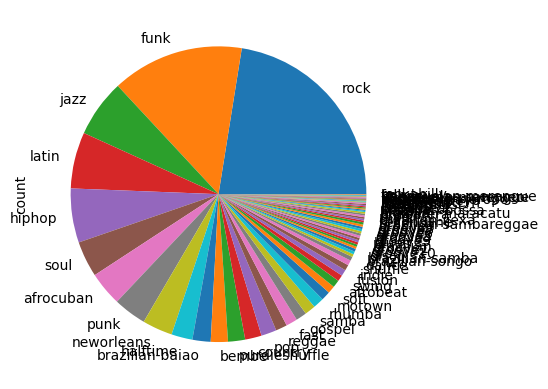

In [43]:
style_counts = pd.concat([data.style1, data.style2]).value_counts()
print(style_counts.head(25))
style_counts.plot(kind="pie")